In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, accuracy_score, make_scorer, ConfusionMatrixDisplay

In [13]:
# Load and split data
filename = "Data/prep-winequality-white.csv"
df_white = pd.read_csv(filename)
df_white.drop('Unnamed: 0', axis=1, inplace=True)
train_w, test_w = train_test_split(df_white, test_size = 0.2, random_state = 42)

train_y = train_w['quality']
train_x = train_w.drop('quality', axis=1)

print(np.unique(train_y))

test_y = test_w['quality']
test_x = test_w.drop('quality', axis=1)

[3. 4. 5. 6. 7. 8. 9.]


In [8]:
# Setup model selection/search

model_params = {
    
    "Decision Tree" : {
        "model" : DecisionTreeRegressor(),
        "params" : {
            "criterion" : ["squared_error", "absolute_error"],
            "max_depth" : [10, 50, 100]
        }
    },
    
    "Random Forest" : {
        "model" : RandomForestRegressor(),
        "params" : {
            "n_estimators":[5, 25, 75],
            "max_depth" : [10, 50, 100]
        }
    }
}

In [9]:
# Custom scoring function for grid search so that it rounds the regression output
# def round_score(score):
#     return 

In [10]:
# Run model search with GridSearchCV
score = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv = 10, return_train_score= False)
    clf.fit(train_x, train_y)
    score.append({
        "Model" : model_name,
        "Best_Score" : clf.best_score_,
        "Best_Params" : clf.best_params_
    })
    
# View model search results
df5 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])
print(df5)


           Model  Best_Score                                      Best_Params
0  Decision Tree    0.191528  {'criterion': 'squared_error', 'max_depth': 10}
1  Random Forest    0.502860            {'max_depth': 50, 'n_estimators': 75}


MSE:
0.6562330545973509
Accuracy:
0.6790890269151139
[3. 4. 5. 6. 7. 8. 9.]
[4. 5. 6. 7. 8.]


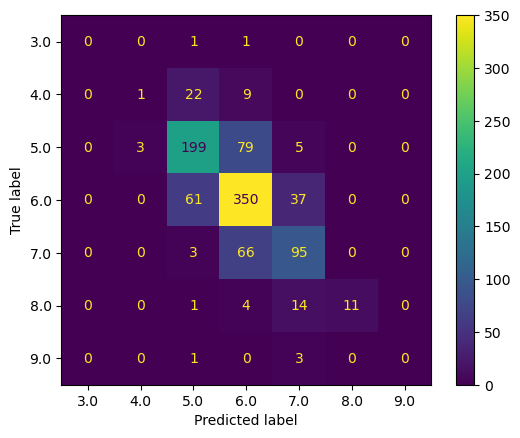

In [11]:
# Random Forest based off gridsearch results

# Make and fit decision tree regressor
forest_w = RandomForestRegressor(max_depth=100, n_estimators=75)
forest_w.fit(train_x, train_y)

# Predict and score model
pred_y = forest_w.predict(test_x).round(0)
print("MSE:")
print(mean_squared_error(test_y, pred_y, squared=False))
print("Accuracy:")
print(accuracy_score(test_y, pred_y))

print(np.unique(test_y))
print(np.unique(pred_y))

ConfusionMatrixDisplay.from_predictions(test_y, pred_y)
plt.show()

In [9]:
# Decision Tree

# Make and fit decision tree regressor
tree_w = DecisionTreeRegressor(criterion='squared_error',max_depth=10)
tree_w.fit(train_x, train_y)

# Predict and score model
pred_y = tree_w.predict(test_x).round(0)
print(mean_squared_error(test_y, pred_y, squared=False))
print(accuracy_score(test_y, pred_y))

0.8101325198959493
0.5507246376811594


In [69]:
# Random Forest

# Make and fit a random forest regressor
forest_w = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=50)
forest_w.fit(train_x, train_y)

# Predict and score model
pred_y = forest_w.predict(test_x).round(0)
print(mean_squared_error(test_y, pred_y, squared=False))
print(accuracy_score(test_y, pred_y))

0.7114851931869163
0.6097308488612836


In [27]:
# Random Forest with transformed data

# Make and transform with pipeline
pca_pipeline = make_pipeline(StandardScaler(), PCA())
train_x_t = pca_pipeline.fit_transform(train_x)
test_x_t =  pca_pipeline.transform(test_x)

# Make and fit a random forest regressor with transformed data
forest_w = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=50)
forest_w.fit(train_x_t, train_y)

# Predict and score model
pred_y = forest_w.predict(test_x_t).round(0)
print(mean_squared_error(test_y, pred_y, squared=False))
print(accuracy_score(test_y, pred_y))

0.6938057794709764
0.6211180124223602


In [8]:
# SVM

# Make, transform, and fit with pipeline
svm_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_reg.fit(train_x, train_y)

# Predict and score model
pred_y = svm_reg.predict(test_x).round(0)
print(mean_squared_error(test_y, pred_y, squared=False))
print(accuracy_score(test_y, pred_y))

0.8618916073713346
0.45510204081632655
